# Traverse a Tree

The following notebok includes codes to traverse a tree using iterative and recursive approach. Usually recursive a bit easire to code but sometimes iterative might help when working with multiples variables in the same scope. In general these are the ways to traverse a tree.
<img src = 'images/traverse_options.png'/>

# Definitions

In [1]:
import sys
sys.path.append('.')
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from time import time

%load_ext autoreload
%autoreload 1
%aimport functions

## Samples

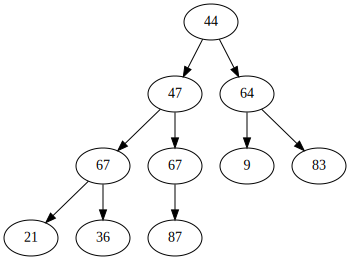

In [2]:
np.random.seed(0)
tree_structures = [np.random.randint(0, 100, i) for i in range(10, 100)]
tree_samples = [create_tree(tree) for tree in tree_structures]
dot = visualize_tree(tree_samples[0])
display(dot)

# DFS Preorder

## Iterative

In [3]:
def preorderTraversalIterative(root):
    """
    :type root: TreeNode
    :rtype: List[int]
    """
    if root is None:
        return []

    stack, output = deque([root, ]), []

    while stack:
        root = stack.pop()
        output.append(root.val)
        if root.right:
            stack.append(root.right)
        if root.left:
            stack.append(root.left)

    return output

## Recursive

In [4]:
def preorderTraversalRecursive(root):
    """
    :type root: TreeNode
    :rtype: List[int]
    """

    def helper(node, values):
        if node is None:
            return

        values.append(node.val)
        helper(node.left, values)
        helper(node.right, values)

    values = []
    helper(root, values)
    return values

## Comparison

In [5]:
tree = tree_samples[10]

print('Recursive ', end="")
%timeit preorderTraversalRecursive(tree)

print('Iterative ', end="")
%timeit preorderTraversalIterative(tree)

Recursive 10.7 µs ± 70.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Iterative 9.69 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# DFS Inorder

## Iterative

In [6]:
def inorderTraversalIterative(root) -> list[int]:
    """
    :type root: TreeNode
    :rtype: List[int]
    """
    if root is None:
        return []

    stack, output = deque(), []

    while stack or root:
        while root:
            stack.append(root)
            root = root.left

        root = stack.pop()
        output.append(root.val)
        root = root.right
            
    return output

## Recursive

In [7]:
def inorderTraversalRecursive(root) -> list[int]:
    """
    :type root: TreeNode
    :rtype: List[int]
    """
    if root is None:
        return
    
    def helper(root, values):
        if root.left:
            helper(root.left, values)
        values.append(root.val)    
        if root.right:
            helper(root.right, values)
            
    values = []        
    helper(root, values)        
    return values

## Comparison

In [8]:
tree = tree_samples[10]

print('Recursive ', end="")
%timeit inorderTraversalRecursive(tree)

print('Iterative ', end="")
%timeit inorderTraversalIterative(tree)

Recursive 9.13 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Iterative 9.32 µs ± 79.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# DFS Postorder

## Iterative

In [9]:
def postorderTraversalIterative(root:TreeNode) -> list[int]:

    if root is None:
        return None

    def peak(stack):
        if len(stack) > 0:
            return stack[-1]
        return None

    output = []
    stack = deque()
    values = []

    while True:
        while root:
            if root.right is not None:
                stack.append(root.right)
            stack.append(root)
            root = root.left

        root = stack.pop()
        if root.right is not None and peak(stack) == root.right:
            stack.pop()
            stack.append(root)
            root = root.right
        else:
            values.append(root.val)    
            root = None

        if len(stack) == 0:
            break


    return values

## Recursive

In [10]:
def postorderTraversalRecursive(root: TreeNode) -> list[int]:

    if root is None:
        return None

    def helper(node, values):
        if node is None:
            return

        helper(node.left, values)
        helper(node.right, values)
        values.append(node.val)
        
    output = []    
    helper(root, output)
    return output

## Comparison

In [11]:
print('Recursive ', end='')
%timeit postorderTraversalRecursive(tree)

print('Iterative ', end='')
%timeit postorderTraversalIterative(tree)

Recursive 10.7 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Iterative 27.1 µs ± 916 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
